<a href="https://colab.research.google.com/github/Rafia-Shaikh-eng/A-Filter-based-Feature-Selection-Approach-in-Multilabel-Classification/blob/main/MI_Feature_selection_40_MLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing required libraries

In [ ]:
# if the scikit-multilearn not installed run this cell 
!pip install scikit-multilearn
# most of the datasets in Weka Arff format for this installed this library 
!pip install arff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 2.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Created 03 arrays of each measuring metrics for 03 classifier

In [ ]:
#03 classifiers hamming loss list 
hamming_loss_MLTSVM=[]
hamming_loss_MLKNN=[]
hamming_loss_BRKNNa=[]
#03 classifier accuracy list
accuracy_MLTSVM=[]
accuracy_MLKNN=[]
accuracy_BRKNNa=[]
#03 classifier precision list
precision_MLTSVM=[]
precision_MLKNN=[]
precision_BRKNNa=[]
#03 classifier recall list
recall_MLTSVM=[]
recall_MLKNN=[]
recall_BRKNNa=[]
#03 classifier f1 measure list
f1_measure_MLTSVM=[]
f1_measure_MLKNN=[]
f1_measure_BRKNNa=[]

#01 Medical Dataset

In [ ]:
#Load Medical Dataset
from skmultilearn.dataset import load_dataset
x1,y1, _, _ = load_dataset('medical', 'undivided')
print("Actual Dataset")
print(x1.shape,y1.shape)
#change to matrix
x1=x1.todense()
y1=y1.todense()
import pandas as pd
#change to dataFrame
x1=pd.DataFrame(x1)
y1=pd.DataFrame(y1)
print("Coverted into Dataframe")
print(x1.shape,y1.shape)

medical:undivided - does not exists downloading
Downloaded medical-undivided
Actual Dataset
(978, 1449) (978, 45)
Coverted into Dataframe
(978, 1449) (978, 45)


##Feature Selection

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x1.columns)*0.4)
print("40% features of medical dataset = ",select_k1)

# get only the numerical features.
numerical_x1 =x1[x1.select_dtypes([np.number]).columns]
features_selected_40=[]
features_weights=[]
for a in range(len(x1.columns)):
   features_weights.append(0)
for i in range(len(y1.columns)):
  # create the SelectKBest with the mutual info strategy.
  selection =SelectKBest(mutual_info_classif, k=select_k1).fit(numerical_x1, y1.iloc[:,i])

  # display the retained features.
  features=list(x1.columns[selection.get_support()])
  labels=y1.columns[i]
  features_selected_40.append([labels, features])
  #print(features_selected_40[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features_selected_40[1]:
    for count in range(len(x1.columns)):
      if(f==x1.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels 
for i in range(len(x1.columns)):
  features_weights[i]=round(features_weights[i]/len(x1.columns),3)
  list_f_w.update({x1.columns[i] : features_weights[i]})

40% features of medical dataset =  580


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x1.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x1.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x1.columns):
    if i not in selected_features:
        x1 = x1.drop(columns=[i])

#print(set(x.columns) == selected_features)


{7, 14, 20, 22, 24, 28, 33, 36, 53, 55, 57, 59, 69, 73, 79, 81, 95, 99, 101, 103, 115, 122, 128, 146, 151, 155, 156, 160, 162, 163, 164, 165, 167, 181, 184, 193, 195, 201, 209, 220, 223, 226, 229, 234, 248, 254, 259, 263, 269, 276, 279, 282, 297, 304, 307, 308, 310, 315, 333, 341, 345, 352, 360, 366, 374, 375, 380, 383, 392, 395, 404, 406, 410, 414, 415, 419, 422, 448, 459, 463, 483, 488, 490, 493, 497, 498, 501, 506, 512, 516, 524, 525, 535, 538, 546, 548, 551, 555, 567, 569, 571, 573, 578, 581, 587, 590, 592, 593, 597, 601, 612, 617, 625, 627, 628, 634, 654, 657, 658, 663, 667, 671, 673, 675, 678, 682, 684, 691, 697, 701, 705, 707, 709, 711, 713, 714, 725, 731, 732, 733, 738, 749, 752, 754, 756, 761, 767, 773, 784, 794, 799, 809, 810, 811, 832, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918

In [ ]:
print(x1.columns)
print(final_features)

Int64Index([   7,   14,   20,   22,   24,   28,   33,   36,   53,   55,
            ...
            1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448],
           dtype='int64', length=724)
[7, 14, 20, 22, 24, 28, 33, 36, 53, 55, 57, 59, 69, 73, 79, 81, 95, 99, 101, 103, 115, 122, 128, 146, 151, 155, 156, 160, 162, 163, 164, 165, 167, 181, 184, 193, 195, 201, 209, 220, 223, 226, 229, 234, 248, 254, 259, 263, 269, 276, 279, 282, 297, 304, 307, 308, 310, 315, 333, 341, 345, 352, 360, 366, 374, 375, 380, 383, 392, 395, 404, 406, 410, 414, 415, 419, 422, 448, 459, 463, 483, 488, 490, 493, 497, 498, 501, 506, 512, 516, 524, 525, 535, 538, 546, 548, 551, 555, 567, 569, 571, 573, 578, 581, 587, 590, 592, 593, 597, 601, 612, 617, 625, 627, 628, 634, 654, 657, 658, 663, 667, 671, 673, 675, 678, 682, 684, 691, 697, 701, 705, 707, 709, 711, 713, 714, 725, 731, 732, 733, 738, 749, 752, 754, 756, 761, 767, 773, 784, 794, 799, 809, 810, 811, 832, 869, 870, 871, 872, 873, 874, 875, 876, 877,

##MLC

In [ ]:
from scipy import sparse as s
x1 = s.csr_matrix(x1)
y1 = s.csr_matrix(y1)
#Train and Test split
from skmultilearn.model_selection import iterative_train_test_split 
x1_train, y1_train, x1_test, y1_test = iterative_train_test_split(x1, y1, test_size = 0.3)
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(685, 724) (293, 724) (685, 45) (293, 45)


###MLTSVM

In [ ]:
#MLTSVM
from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(max_iteration=1000,c_k=2**-6)
# train
classifier1.fit(x1_train, y1_train)
# predict
MLTSVM1_predictions = classifier1.predict(x1_test)

###MLKNN

In [ ]:
#MLKNN
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for medical dataset it has 45 labels. 
classifier2 = MLkNN(k=45)
# train
classifier2.fit(x1_train, y1_train)
# predict
MLKNN1_predictions = classifier2.predict(x1_test)

###BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=45)
# train
classifier3.fit(x1_train, y1_train)
# predict
BR1_predictions = classifier3.predict(x1_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y1_test, MLTSVM1_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y1_test, MLKNN1_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y1_test, BR1_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y1_test, MLTSVM1_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y1_test, MLKNN1_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y1_test, BR1_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y1_test, MLTSVM1_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y1_test, MLKNN1_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y1_test, BR1_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels)")
print("------------------------------")
print("MLTSVM -> ",MLTSVM1_predictions.shape)
print("MLKNN  -> ",MLKNN1_predictions.shape)
print("BRKNNa -> ",BR1_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y1_test, MLTSVM1_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y1_test, MLKNN1_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y1_test, BR1_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y1_test, MLTSVM1_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y1_test, MLKNN1_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y1_test, BR1_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y1_test, MLTSVM1_predictions, average='micro', zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y1_test, MLKNN1_predictions, average='micro', zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y1_test, BR1_predictions, average='micro', zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y1_test, MLTSVM1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y1_test, MLKNN1_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y1_test, BR1_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels)
------------------------------
MLTSVM ->  (293, 45)
MLKNN  ->  (293, 45)
BRKNNa ->  (293, 45)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.02
MLKNN  ->  0.02
BRKNNa ->  0.02
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.39
MLKNN  ->  0.41
BRKNNa ->  0.27
------------------------------
	Precision
------------------------------
MLTSVM ->  0.62
MLKNN ->  0.85
BRKNNa ->  0.83
------------------------------
	Recall
------------------------------
MLTSVM ->  0.77
MLTSVM ->  0.48
MLTSVM ->  0.31
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.69
MLTSVM ->  0.61
MLTSVM ->  0.45



#02 Enron Dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x2,y2, _, _ = load_dataset('enron', 'undivided')
print("Actual Dataset")
print(x2.shape,y2.shape)
#change to matrix
x2=x2.todense()
y2=y2.todense()
import pandas as pd
#change to dataFrame
x2=pd.DataFrame(x2)
y2=pd.DataFrame(y2)
print("Coverted into Dataframe")
print(x2.shape,y2.shape)

enron:undivided - does not exists downloading
Downloaded enron-undivided
Actual Dataset
(1702, 1001) (1702, 53)
Coverted into Dataframe
(1702, 1001) (1702, 53)


##Feature Selection 

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x2.columns)*0.4)
print("40% features of medical dataset = ",select_k1)

# get only the numerical features.
numerical_x2 =x2[x2.select_dtypes([np.number]).columns]
features_selected_40=[]
features_weights=[]
for a in range(len(x2.columns)):
   features_weights.append(0)
for i in range(len(y2.columns)):
  # create the SelectKBest with the mutual info strategy.
  selection =SelectKBest(mutual_info_classif, k=select_k1).fit(numerical_x2, y2.iloc[:,i])

  # display the retained features.
  features=list(x2.columns[selection.get_support()])
  labels=y2.columns[i]
  features_selected_40.append([labels, features])
  #print(features_selected_40[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x2.columns)):
      if(f==x2.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels 
for i in range(len(x2.columns)):
  features_weights[i]=round(features_weights[i]/len(x2.columns),3)
  list_f_w.update({x2.columns[i] : features_weights[i]})

40% features of medical dataset =  400


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x2.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x2.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x2.columns):
    if i not in selected_features:
        x2 = x2.drop(columns=[i])

#print(set(x.columns) == selected_features)

{2, 3, 6, 9, 14, 17, 26, 29, 30, 32, 41, 54, 55, 60, 64, 68, 71, 74, 76, 78, 80, 82, 83, 85, 86, 90, 91, 94, 95, 98, 102, 103, 106, 107, 108, 109, 112, 113, 114, 115, 117, 118, 120, 122, 123, 124, 127, 129, 130, 131, 133, 138, 139, 140, 141, 144, 147, 150, 154, 155, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 177, 178, 183, 186, 188, 191, 192, 194, 195, 196, 199, 200, 201, 202, 210, 212, 213, 214, 215, 216, 217, 220, 221, 223, 226, 227, 228, 230, 232, 233, 235, 236, 238, 243, 248, 249, 251, 252, 253, 254, 255, 256, 261, 262, 263, 264, 266, 267, 268, 269, 270, 272, 273, 274, 278, 279, 282, 287, 288, 291, 292, 294, 298, 301, 302, 303, 304, 310, 312, 313, 319, 320, 322, 323, 324, 325, 326, 327, 328, 331, 332, 333, 339, 340, 343, 346, 347, 348, 349, 350, 352, 353, 355, 357, 358, 359, 364, 365, 368, 369, 370, 371, 373, 374, 376, 378, 380, 381, 385, 388, 390, 395, 397, 399, 402, 403, 408, 409, 413, 414, 425, 426, 428, 429, 430, 431, 433, 434, 435, 436, 441, 443, 444, 447, 448

In [ ]:
print(x2.columns)
print(final_features)

Int64Index([   2,    3,    6,    9,   14,   17,   26,   29,   30,   32,
            ...
             988,  990,  991,  993,  994,  995,  997,  998,  999, 1000],
           dtype='int64', length=500)
[2, 3, 6, 9, 14, 17, 26, 29, 30, 32, 41, 54, 55, 60, 64, 68, 71, 74, 76, 78, 80, 82, 83, 85, 86, 90, 91, 94, 95, 98, 102, 103, 106, 107, 108, 109, 112, 113, 114, 115, 117, 118, 120, 122, 123, 124, 127, 129, 130, 131, 133, 138, 139, 140, 141, 144, 147, 150, 154, 155, 159, 160, 161, 162, 165, 166, 167, 168, 169, 170, 171, 172, 177, 178, 183, 186, 188, 191, 192, 194, 195, 196, 199, 200, 201, 202, 210, 212, 213, 214, 215, 216, 217, 220, 221, 223, 226, 227, 228, 230, 232, 233, 235, 236, 238, 243, 248, 249, 251, 252, 253, 254, 255, 256, 261, 262, 263, 264, 266, 267, 268, 269, 270, 272, 273, 274, 278, 279, 282, 287, 288, 291, 292, 294, 298, 301, 302, 303, 304, 310, 312, 313, 319, 320, 322, 323, 324, 325, 326, 327, 328, 331, 332, 333, 339, 340, 343, 346, 347, 348, 349, 350, 352, 353, 355, 357, 358,

##MLC

In [ ]:
from scipy import sparse as s
x2 = s.csr_matrix(x2)
y2 = s.csr_matrix(y2)
#Train and Test split
from skmultilearn.model_selection import iterative_train_test_split 
x2_train, y2_train, x2_test, y2_test = iterative_train_test_split(x2, y2, test_size = 0.3)
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(1194, 500) (508, 500) (1194, 53) (508, 53)


###MLTSVM

In [ ]:
#from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(c_k =2**-6)
# train
classifier1.fit(x2_train, y2_train)
# predict
MLTSVM2_predictions = classifier1.predict(x2_test)

###MLKNN

In [ ]:
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for enron dataset it has 53 labels. 
classifier2 = MLkNN(k=53)

# train
classifier2.fit(x2_train, y2_train)

# predict
MLKNN2_predictions = classifier2.predict(x2_test)

###BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=53)
# train
classifier3.fit(x2_train, y2_train)
# predict
BR2_predictions = classifier3.predict(x2_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y2_test, MLTSVM2_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y2_test, MLKNN2_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y2_test, BR2_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y2_test, MLTSVM2_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y2_test, MLKNN2_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y2_test, BR2_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y2_test, MLTSVM2_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y2_test, MLKNN2_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y2_test, BR2_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels)")
print("------------------------------")
print("MLTSVM -> ",MLTSVM2_predictions.shape)
print("MLKNN  -> ",MLKNN2_predictions.shape)
print("BRKNNa -> ",BR2_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y2_test, MLTSVM2_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y2_test, MLKNN2_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y2_test, BR2_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y2_test, MLTSVM2_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y2_test, MLKNN2_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y2_test, BR2_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y2_test, MLTSVM2_predictions, average='micro', zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y2_test, MLKNN2_predictions, average='micro', zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y2_test, BR2_predictions, average='micro', zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.recall_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y2_test, MLTSVM2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y2_test, MLKNN2_predictions, average='micro',zero_division='warn'),2))
print("MLTSVM -> ",round(m.f1_score(y2_test, BR2_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels)
------------------------------
MLTSVM ->  (508, 53)
MLKNN  ->  (508, 53)
BRKNNa ->  (508, 53)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.07
MLKNN  ->  0.06
BRKNNa ->  0.06
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.02
MLKNN  ->  0.06
BRKNNa ->  0.08
------------------------------
	Precision
------------------------------
MLTSVM ->  0.43
MLKNN ->  0.64
BRKNNa ->  0.62
------------------------------
	Recall
------------------------------
MLTSVM ->  0.38
MLTSVM ->  0.35
MLTSVM ->  0.16
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.4
MLTSVM ->  0.45
MLTSVM ->  0.26



#02 Scene Dataset

In [ ]:
#from skmultilearn.dataset import load_dataset
x3,y3, _, _ = load_dataset('scene', 'undivided')
print("Actual Dataset")
print(x3.shape,y3.shape)
#change to matrix
x3=x3.todense()
y3=y3.todense()
import pandas as pd
#change to dataFrame
x3=pd.DataFrame(x3)
y3=pd.DataFrame(y3)
print("Coverted into Dataframe")
print(x3.shape,y3.shape)

scene:undivided - does not exists downloading
Downloaded scene-undivided
Actual Dataset
(2407, 294) (2407, 6)
Coverted into Dataframe
(2407, 294) (2407, 6)


##Feature Selection

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x3.columns)*0.4)
print("40% features of medical dataset = ",select_k1)

# get only the numerical features.
numerical_x3 =x3[x3.select_dtypes([np.number]).columns]
features_selected_40=[]
features_weights=[]
for a in range(len(x3.columns)):
   features_weights.append(0)
for i in range(len(y3.columns)):
  # create the SelectKBest with the mutual info strategy.
  selection =SelectKBest(mutual_info_classif, k=select_k1).fit(numerical_x3, y3.iloc[:,i])

  # display the retained features.
  features=list(x3.columns[selection.get_support()])
  labels=y3.columns[i]
  features_selected_40.append([labels, features])
  #print(features_selected_40[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x3.columns)):
      if(f==x3.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels 
for i in range(len(x3.columns)):
  features_weights[i]=round(features_weights[i]/len(x3.columns),3)
  list_f_w.update({x3.columns[i] : features_weights[i]})

40% features of medical dataset =  118


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x3.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x3.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x3.columns):
    if i not in selected_features:
        x3 = x3.drop(columns=[i])

#print(set(x.columns) == selected_features)

{1, 2, 3, 5, 6, 11, 21, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 54, 73, 79, 81, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 142, 143, 144, 145, 147, 152, 156, 165, 167, 170, 171, 182, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243}


In [ ]:
print(x3.columns)
print(final_features)

Int64Index([  1,   2,   3,   5,   6,  11,  21,  28,  29,  30,
            ...
            234, 235, 236, 237, 238, 239, 240, 241, 242, 243],
           dtype='int64', length=147)
[1, 2, 3, 5, 6, 11, 21, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 54, 73, 79, 81, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 142, 143, 144, 145, 147, 152, 156, 165, 167, 170, 171, 182, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243]


##MLC

In [ ]:
from scipy import sparse as s
x3 = s.csr_matrix(x3)
y3 = s.csr_matrix(y3)
#Train and Test Split
from skmultilearn.model_selection import iterative_train_test_split 
x3_train, y3_train, x3_test, y3_test = iterative_train_test_split(x3, y3, test_size = 0.3)
print(x3_train.shape, x3_test.shape, y3_train.shape, y3_test.shape)

(1685, 147) (722, 147) (1685, 6) (722, 6)


###MLTSVM

In [ ]:
#from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(c_k =2**-6)
# train
classifier1.fit(x3_train, y3_train)
# predict
MLTSVM3_predictions = classifier1.predict(x3_test)

###MLKNN

In [ ]:
#from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.
# apply MLkNN for Scene dataset it has 6 labels. 
classifier2 = MLkNN(k=6)

# train
classifier2.fit(x3_train, y3_train)

# predict
MLKNN3_predictions = classifier2.predict(x3_test)

###BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=6)
# train
classifier3.fit(x3_train, y3_train)
# predict
BR3_predictions = classifier3.predict(x3_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y3_test, MLTSVM3_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y3_test, MLKNN3_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y3_test, BR3_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y3_test, MLTSVM3_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y3_test, MLKNN3_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y3_test, BR3_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y3_test, MLTSVM3_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y3_test, MLKNN3_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y3_test, BR3_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM3_predictions.shape)
print("MLKNN  -> ",MLKNN3_predictions.shape)
print("BRKNNa -> ",BR3_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y3_test, MLTSVM3_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y3_test, MLKNN3_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y3_test, BR3_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y3_test, MLTSVM3_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y3_test, MLKNN3_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y3_test, BR3_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y3_test, MLTSVM3_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y3_test, MLKNN3_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.f1_score(y3_test, BR3_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (722, 6)
MLKNN  ->  (722, 6)
BRKNNa ->  (722, 6)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.81
MLKNN  ->  0.1
BRKNNa ->  0.1
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.0
MLKNN  ->  0.59
BRKNNa ->  0.55
------------------------------
	Precision
------------------------------
MLTSVM ->  0.18
MLKNN ->  0.78
BRKNNa ->  0.8
------------------------------
	Recall
------------------------------
MLTSVM ->  1.0
MLKNN ->  0.62
BRKNNa ->  0.56
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.31
MLKNN ->  0.69
BRKNNa ->  0.66



#04 Emotions Dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x4,y4, _, _ = load_dataset('emotions', 'undivided')
print("Actual Dataset")
print(x4.shape,y4.shape)
#change to matrix
x4=x4.todense()
y4=y4.todense()
import pandas as pd
#change to dataFrame
x4=pd.DataFrame(x4)
y4=pd.DataFrame(y4)
print("Coverted into Dataframe")
print(x4.shape,y4.shape)

emotions:undivided - does not exists downloading
Downloaded emotions-undivided
Actual Dataset
(593, 72) (593, 6)
Coverted into Dataframe
(593, 72) (593, 6)


##Feature Selection

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x4.columns)*0.4)
print("40% features of medical dataset = ",select_k1)

# get only the numerical features.
numerical_x4 =x4[x4.select_dtypes([np.number]).columns]
features_selected_40=[]
features_weights=[]
for a in range(len(x4.columns)):
   features_weights.append(0)
for i in range(len(y4.columns)):
  # create the SelectKBest with the mutual info strategy.
  selection =SelectKBest(mutual_info_classif, k=select_k1).fit(numerical_x4, y4.iloc[:,i])

  # display the retained features.
  features=list(x4.columns[selection.get_support()])
  labels=y4.columns[i]
  features_selected_40.append([labels, features])
  #print(features_selected_40[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x4.columns)):
      if(f==x4.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels 
for i in range(len(x4.columns)):
  features_weights[i]=round(features_weights[i]/len(x4.columns),3)
  list_f_w.update({x4.columns[i] : features_weights[i]})

40% features of medical dataset =  29


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x4.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x4.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x4.columns):
    if i not in selected_features:
        x4 = x4.drop(columns=[i])

#print(set(x.columns) == selected_features)

{0, 1, 2, 3, 4, 16, 17, 18, 23, 25, 26, 27, 29, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 53, 56, 57, 58, 59, 60, 61, 62, 63, 71}


In [ ]:
print(x4.columns)
print(final_features)

Int64Index([ 0,  1,  2,  3,  4, 16, 17, 18, 23, 25, 26, 27, 29, 33, 35, 36, 37,
            39, 40, 41, 42, 43, 44, 45, 46, 47, 53, 56, 57, 58, 59, 60, 61, 62,
            63, 71],
           dtype='int64')
[0, 1, 2, 3, 4, 16, 17, 18, 23, 25, 26, 27, 29, 33, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 53, 56, 57, 58, 59, 60, 61, 62, 63, 71]


##MLC

In [ ]:
from scipy import sparse as s
x4 = s.csr_matrix(x4)
y4 = s.csr_matrix(y4)
#Train and Test Split
from skmultilearn.model_selection import iterative_train_test_split 
x4_train, y4_train, x4_test, y4_test = iterative_train_test_split(x4, y4, test_size = 0.3)
print(x4_train.shape, x4_test.shape, y4_train.shape, y4_test.shape)

(417, 36) (176, 36) (417, 6) (176, 6)


###MLTSVM

In [ ]:
from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(c_k =2**-6)
# train
classifier1.fit(x4_train, y4_train)
# predict
MLTSVM4_predictions = classifier1.predict(x4_test)

###MLKNN

In [ ]:
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.

# apply MLkNN for delicious dataset it has 983 labels. 
classifier2 = MLkNN(k=6)

# train
classifier2.fit(x4_train, y4_train)

# predict
MLKNN4_predictions = classifier2.predict(x4_test)

###BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=6)
# train
classifier3.fit(x4_train, y4_train)
# predict
BR4_predictions = classifier3.predict(x4_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y4_test, MLTSVM4_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y4_test, MLKNN4_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y4_test, BR4_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y4_test, MLTSVM4_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y4_test, MLKNN4_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y4_test, BR4_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y4_test, MLTSVM4_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y4_test, MLKNN4_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y4_test, BR4_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y4_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y4_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y4_test, BR4_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y4_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y4_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y4_test, BR4_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM4_predictions.shape)
print("MLKNN  -> ",MLKNN4_predictions.shape)
print("BRKNNa -> ",BR4_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y4_test, MLTSVM4_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y4_test, MLKNN4_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y4_test, BR4_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y4_test, MLTSVM4_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y4_test, MLKNN4_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y4_test, BR4_predictions),2))
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y4_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y4_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.precision_score(y4_test, BR4_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y4_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y4_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y4_test, BR4_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y4_test, MLTSVM4_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y4_test, MLKNN4_predictions, average='micro',zero_division='warn'),2))
print("BHKNNa -> ",round(m.f1_score(y4_test, BR4_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (176, 6)
MLKNN  ->  (176, 6)
BRKNNa ->  (176, 6)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.68
MLKNN  ->  0.27
BRKNNa ->  0.26
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.0
MLKNN  ->  0.23
BRKNNa ->  0.19
	Precision
------------------------------
MLTSVM ->  0.32
MLKNN ->  0.59
BRKNNa ->  0.64
------------------------------
	Recall
------------------------------
MLTSVM ->  1.0
MLKNN ->  0.5
BRKNNa ->  0.4
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.48
MLKNN ->  0.54
BHKNNa ->  0.49



#05 Genbase Dataset

In [ ]:
from skmultilearn.dataset import load_dataset
x5,y5, _, _ = load_dataset('genbase', 'undivided')
print("Actual Dataset")
print(x5.shape,y5.shape)
#change to matrix
x5=x5.todense()
y5=y5.todense()
import pandas as pd
#change to dataFrame
x5=pd.DataFrame(x5)
y5=pd.DataFrame(y5)
print("Coverted into Dataframe")
print(x5.shape,y5.shape)

genbase:undivided - does not exists downloading
Downloaded genbase-undivided
Actual Dataset
(662, 1186) (662, 27)
Coverted into Dataframe
(662, 1186) (662, 27)


##Feature Selection

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import numpy as np
import pandas as pd

# select the number of features you want to retain.
select_k1 = round(len(x5.columns)*0.4)
print("40% features of medical dataset = ",select_k1)

# get only the numerical features.
numerical_x5 =x5[x5.select_dtypes([np.number]).columns]
features_selected_40=[]
features_weights=[]
for a in range(len(x5.columns)):
   features_weights.append(0)
for i in range(len(y5.columns)):
  # create the SelectKBest with the mutual info strategy.
  selection =SelectKBest(mutual_info_classif, k=select_k1).fit(numerical_x5, y5.iloc[:,i])

  # display the retained features.
  features=list(x5.columns[selection.get_support()])
  labels=y5.columns[i]
  features_selected_40.append([labels, features])
  #print(features_selected_40[i])

  #calculating weight for each feature
  #if a feature is correlate to label count them and than divide it by total labels
  for f in features:
    for count in range(len(x5.columns)):
      if(f==x5.columns[count]):
        features_weights[count]+=1
list_f_w={}
#if a feature is correlate to label count them and than divide it by total labels 
for i in range(len(x5.columns)):
  features_weights[i]=round(features_weights[i]/len(x5.columns),3)
  list_f_w.update({x5.columns[i] : features_weights[i]})

40% features of medical dataset =  474


In [ ]:
#sort weights
import operator
sorted_list_f_w = sorted(list_f_w.items(), key=operator.itemgetter(1), reverse=True)
import collections
sorted_dict_f = collections.OrderedDict(sorted_list_f_w)
#print(sorted_dict_f)

In [ ]:
#now, access top 50% weighted features(keys)
final_features=[]
found=False
for i in range(round(len(x5.columns)*0.5)):
    final_features.append(list(sorted_dict_f.keys())[i])
final_features.sort()

#drop other than top 50% weighted features
selected_features = set(x5.columns).intersection(final_features)

#print(set(x.columns))
print(selected_features)

for i in list(x5.columns):
    if i not in selected_features:
        x5 = x5.drop(columns=[i])

#print(set(x.columns) == selected_features)

{0, 5, 6, 7, 8, 11, 13, 15, 16, 17, 20, 22, 28, 31, 32, 34, 35, 36, 37, 40, 42, 52, 53, 62, 63, 66, 67, 68, 70, 73, 74, 79, 80, 84, 86, 87, 88, 89, 91, 92, 93, 105, 106, 109, 110, 111, 120, 121, 132, 134, 135, 141, 143, 145, 146, 147, 153, 154, 155, 159, 162, 164, 167, 169, 171, 172, 174, 175, 177, 178, 182, 184, 185, 186, 187, 191, 192, 193, 194, 199, 200, 201, 202, 204, 205, 206, 208, 214, 215, 220, 221, 225, 230, 231, 232, 235, 240, 241, 245, 249, 253, 258, 260, 261, 262, 263, 268, 270, 273, 278, 280, 282, 284, 285, 295, 301, 302, 303, 305, 309, 313, 317, 318, 323, 328, 329, 336, 338, 341, 343, 344, 347, 351, 352, 353, 356, 357, 358, 359, 367, 369, 371, 374, 380, 381, 384, 388, 391, 394, 395, 398, 399, 400, 405, 406, 409, 412, 416, 417, 418, 425, 426, 427, 431, 436, 439, 440, 442, 443, 446, 448, 449, 451, 452, 453, 455, 457, 458, 462, 463, 464, 469, 473, 476, 478, 480, 481, 482, 483, 485, 486, 487, 488, 493, 495, 497, 498, 502, 503, 505, 509, 511, 515, 516, 518, 520, 522, 526, 528, 

In [ ]:
print(x5.columns)
print(final_features)

Int64Index([   0,    5,    6,    7,    8,   11,   13,   15,   16,   17,
            ...
            1172, 1173, 1174, 1175, 1176, 1179, 1180, 1181, 1182, 1183],
           dtype='int64', length=593)
[0, 5, 6, 7, 8, 11, 13, 15, 16, 17, 20, 22, 28, 31, 32, 34, 35, 36, 37, 40, 42, 52, 53, 62, 63, 66, 67, 68, 70, 73, 74, 79, 80, 84, 86, 87, 88, 89, 91, 92, 93, 105, 106, 109, 110, 111, 120, 121, 132, 134, 135, 141, 143, 145, 146, 147, 153, 154, 155, 159, 162, 164, 167, 169, 171, 172, 174, 175, 177, 178, 182, 184, 185, 186, 187, 191, 192, 193, 194, 199, 200, 201, 202, 204, 205, 206, 208, 214, 215, 220, 221, 225, 230, 231, 232, 235, 240, 241, 245, 249, 253, 258, 260, 261, 262, 263, 268, 270, 273, 278, 280, 282, 284, 285, 295, 301, 302, 303, 305, 309, 313, 317, 318, 323, 328, 329, 336, 338, 341, 343, 344, 347, 351, 352, 353, 356, 357, 358, 359, 367, 369, 371, 374, 380, 381, 384, 388, 391, 394, 395, 398, 399, 400, 405, 406, 409, 412, 416, 417, 418, 425, 426, 427, 431, 436, 439, 440, 442, 443, 4

##MLC

In [ ]:
from scipy import sparse as s
x5 = s.csr_matrix(x5)
y5 = s.csr_matrix(y5)
#Train and test split
from skmultilearn.model_selection import iterative_train_test_split 
x5_train, y5_train, x5_test, y5_test = iterative_train_test_split(x5, y5, test_size = 0.3)
print(x5_train.shape, x5_test.shape, y5_train.shape, y5_test.shape)

(463, 593) (199, 593) (463, 27) (199, 27)


###MLTSVM

In [ ]:
from skmultilearn.adapt import MLTSVM
classifier1 = MLTSVM(c_k =2**-6)
# train
classifier1.fit(x5_train, y5_train)
# predict
MLTSVM5_predictions = classifier1.predict(x5_test)

###MLKNN

In [ ]:
from skmultilearn.adapt import MLkNN
#MLKNN is an adaptation of the kNN lazy learning algorithm for multi-label data.

# apply MLkNN for delicious dataset it has 983 labels. 
classifier2 = MLkNN(k=27)

# train
classifier2.fit(x5_train, y5_train)

# predict
MLKNN5_predictions = classifier2.predict(x5_test)

###BRKNNa

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
classifier3 = BRkNNaClassifier(k=27)
# train
classifier3.fit(x5_train, y5_train)
# predict
BR5_predictions = classifier3.predict(x5_test)

##Measuring Metrics 

In [ ]:
import sklearn.metrics as m
#Hamming Loss
hamming_loss_MLTSVM.append(round(m.hamming_loss(y5_test, MLTSVM5_predictions),2))
hamming_loss_MLKNN.append(round(m.hamming_loss(y5_test, MLKNN5_predictions),2))
hamming_loss_BRKNNa.append(round(m.hamming_loss(y5_test, BR5_predictions),2))

#Accuracy
accuracy_MLTSVM.append(round(m.accuracy_score(y5_test, MLTSVM5_predictions),2))
accuracy_MLKNN.append(round(m.accuracy_score(y5_test, MLKNN5_predictions),2))
accuracy_BRKNNa.append(round(m.accuracy_score(y5_test, BR5_predictions),2))

#Micro Precision
precision_MLTSVM.append(round(m.precision_score(y5_test, MLTSVM5_predictions, average='micro', zero_division='warn'),2))
precision_MLKNN.append(round(m.precision_score(y5_test, MLKNN5_predictions, average='micro', zero_division='warn'),2))
precision_BRKNNa.append(round(m.precision_score(y5_test, BR5_predictions, average='micro', zero_division='warn'),2))

#Micro Recall
recall_MLTSVM.append(round(m.recall_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
recall_MLKNN.append(round(m.recall_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
recall_BRKNNa.append(round(m.recall_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
#Micro F1 measure
f1_measure_MLTSVM.append(round(m.f1_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
f1_measure_MLKNN.append(round(m.f1_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
f1_measure_BRKNNa.append(round(m.f1_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))

In [ ]:
print("------------------------------")
print("\t(Examples,Labels")
print("------------------------------")
print("MLTSVM -> ",MLTSVM5_predictions.shape)
print("MLKNN  -> ",MLKNN5_predictions.shape)
print("BRKNNa -> ",BR5_predictions.shape)
import sklearn.metrics as m
print("------------------------------")
print("\tHamming Loss")
print("------------------------------")
print("MLTSVM -> ",round(m.hamming_loss(y5_test, MLTSVM5_predictions),2))
print("MLKNN  -> ",round(m.hamming_loss(y5_test, MLKNN5_predictions),2))
print("BRKNNa -> ",round(m.hamming_loss(y5_test, BR5_predictions),2))
print("------------------------------")
print("\tAccuracy")
print("------------------------------")
print("MLTSVM -> ",round(m.accuracy_score(y5_test, MLTSVM5_predictions),2))
print("MLKNN  -> ",round(m.accuracy_score(y5_test, MLKNN5_predictions),2))
print("BRKNNa -> ",round(m.accuracy_score(y5_test, BR5_predictions),2))
print("------------------------------")
print("\tPrecision")
print("------------------------------")
print("MLTSVM -> ",round(m.precision_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.precision_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("MLKNNa -> ",round(m.precision_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tRecall")
print("------------------------------")
print("MLTSVM -> ",round(m.recall_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.recall_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.recall_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
print("------------------------------")
print("\tF1-measure")
print("------------------------------")
#f1=2*(p*r)/(p+r)
print("MLTSVM -> ",round(m.f1_score(y5_test, MLTSVM5_predictions, average='micro',zero_division='warn'),2))
print("MLKNN -> ",round(m.f1_score(y5_test, MLKNN5_predictions, average='micro',zero_division='warn'),2))
print("BRKNNa -> ",round(m.f1_score(y5_test, BR5_predictions, average='micro',zero_division='warn'),2))
print()

------------------------------
	(Examples,Labels
------------------------------
MLTSVM ->  (199, 27)
MLKNN  ->  (199, 27)
BRKNNa ->  (199, 27)
------------------------------
	Hamming Loss
------------------------------
MLTSVM ->  0.03
MLKNN  ->  0.04
BRKNNa ->  0.04
------------------------------
	Accuracy
------------------------------
MLTSVM ->  0.55
MLKNN  ->  0.15
BRKNNa ->  0.15
------------------------------
	Precision
------------------------------
MLTSVM ->  0.68
MLKNN ->  0.81
MLKNNa ->  0.76
------------------------------
	Recall
------------------------------
MLTSVM ->  0.85
MLKNN ->  0.12
BRKNNa ->  0.12
------------------------------
	F1-measure
------------------------------
MLTSVM ->  0.75
MLKNN ->  0.21
BRKNNa ->  0.21



#Results based on EVALUATION MEASURES

##Hamming Loss

[0.02, 0.06, 0.1, 0.27, 0.04]


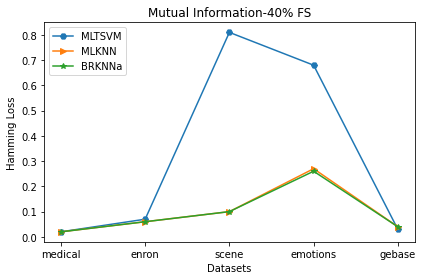

In [ ]:
import matplotlib.pyplot as plt
dataset=['medical','enron','scene','emotions','gebase']
print(hamming_loss_MLKNN)
fig, ax=plt.subplots()
ax.plot(dataset,hamming_loss_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,hamming_loss_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,hamming_loss_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='upper left')
ax.set_title('Mutual Information-40% FS')
ax.set_xlabel('Datasets')
ax.set_ylabel('Hamming Loss')
plt.tight_layout()
plt.savefig('MI-40-hamming loss')

##Accuracy

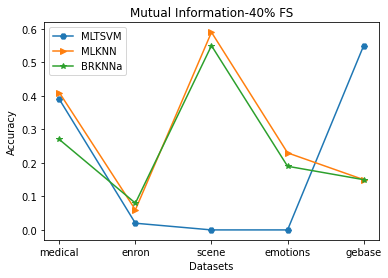

In [ ]:
#import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.plot(dataset,accuracy_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,accuracy_MLKNN, label='MLKNN',marker='>' )
ax.plot(dataset,accuracy_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='upper left')
ax.set_title('Mutual Information-40% FS')
ax.set_xlabel('Datasets')
ax.set_ylabel('Accuracy')
plt.savefig('MI-40-Accuracy')

##Precision

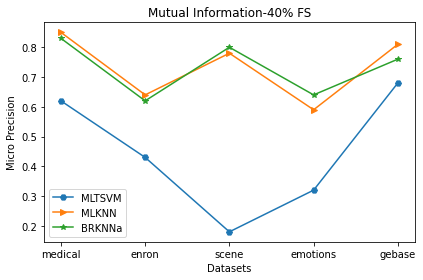

In [ ]:
fig, ax=plt.subplots()
ax.plot(dataset,precision_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,precision_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,precision_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='lower left')
ax.set_title('Mutual Information-40% FS')
ax.set_xlabel('Datasets')
ax.set_ylabel('Micro Precision')
plt.tight_layout()
plt.savefig('MI-40-Precision')

##Recall

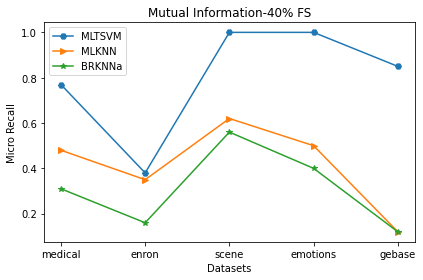

In [ ]:
fig, ax=plt.subplots()
ax.plot(dataset,recall_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,recall_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,recall_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc='upper left')
ax.set_title('Mutual Information-40% FS')
ax.set_xlabel('Datasets')
ax.set_ylabel('Micro Recall')
plt.tight_layout()
plt.savefig('MI-40-Recall')

##F1 Measure

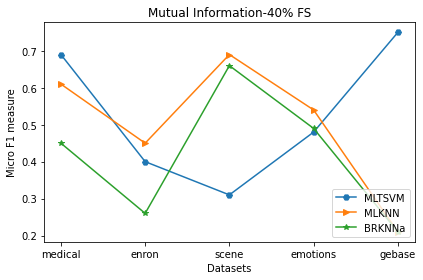

In [ ]:
#F1 measure
fig, ax=plt.subplots()
ax.plot(dataset,f1_measure_MLTSVM, label='MLTSVM',marker='H')
ax.plot(dataset,f1_measure_MLKNN, label='MLKNN',marker='>')
ax.plot(dataset,f1_measure_BRKNNa, label='BRKNNa',marker='*')
ax.legend(loc=4)
ax.set_title('Mutual Information-40% FS')
ax.set_xlabel('Datasets')
ax.set_ylabel('Micro F1 measure')
plt.tight_layout()
plt.savefig('MI-40-f1 measure')